# Confidence intervals 
- Confidence intervals (CIs) are a way to express the uncertainty around a statistical estimate. They provide a range of values within which we are reasonably confident the true population parameter lies.

- They give you a range of plausible values for a population parameter (like the mean).
- They tell you how confident you can be that the true value is within that range.
### Key components:
- Estimate: The sample statistic (e.g., sample mean).
- Margin of error: The range added and subtracted from the estimate.
- Point estimate: A point estimate is a single number that guesses a population value (like the average) based on a sample. It's your "best guess" from the data you have.
- Confidence Interval: A range of likely values for a population parameter.
- Confidence Level: How sure we are that the true parameter is within that range (as a percentage).









##### Confidence intervals are calculated using various procedures, each suited to different data types and situations. Here are the main types:


- Z-Interval: Known standard deviation, large sample.
- T-Interval: Unknown standard deviation, small sample.
- Proportion Interval: Estimating percentages.
- Chi-Square Interval: Estimating variance.
- Regression Interval: Predictions based off regression models.

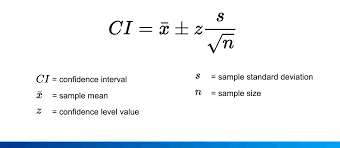

# Confidence Interval

- Confidence level tells us how sure we are that the true value is within a calculated range. If we have to repeat the sampling process many times we expect that a certain percentage of those intervals will include the true value.

- 90% Confidence: 90% of intervals would include the true population value.
- 95% Confidence: 95% of intervals would include the true value which is commonly used in data science.
- 99% Confidence: 99% of intervals would include the true value but the intervals would be wider.

# Why are Confidence Intervals Important in Data Science?
- They helps to measure uncertainty in predictions and estimates.
- Through this data scientists finds the reliable results instead of just giving a single number.
- They are widely used in A/B testing, machine learning, and survey analysis which we study later to check if results are meaningful.

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import math



df = pd.read_csv("C:\\Users\\shanmukh.adari\\Documents\\GitHub\\DSML_PRACTISE_FILES\\DATASETS\\miles.csv")
df.head()

,date,is_weekend,miles
0,2022-01-01,False,27
1,2022-01-02,True,5
2,2022-01-03,False,36
3,2022-01-04,False,32
4,2022-01-05,False,23


(array([105., 304., 306.,   2.,   1.,   3.,   2.,   2.,   1.,   4.]),
 array([  0. ,  14.8,  29.6,  44.4,  59.2,  74. ,  88.8, 103.6, 118.4,
        133.2, 148. ]),
 <BarContainer object of 10 artists>)

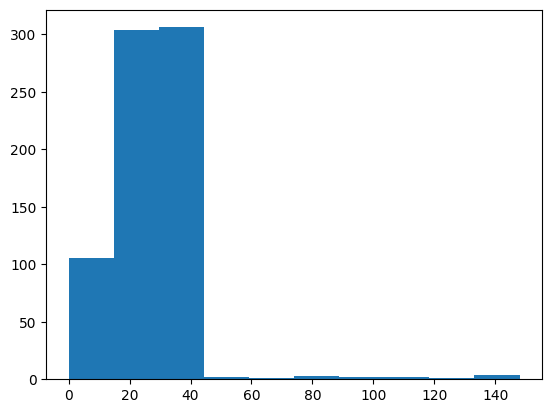

In [54]:
plt.hist(df.miles)

In [55]:
# Lets apply CLT
samples = []
for i in range(1000):
    samples.append(np.random.choice(df['miles'],size=50).mean())

samples =  np.array(samples)

(array([ 25., 123., 341., 294., 147.,  51.,  16.,   1.,   1.,   1.]),
 array([21.96 , 23.768, 25.576, 27.384, 29.192, 31.   , 32.808, 34.616,
        36.424, 38.232, 40.04 ]),
 <BarContainer object of 10 artists>)

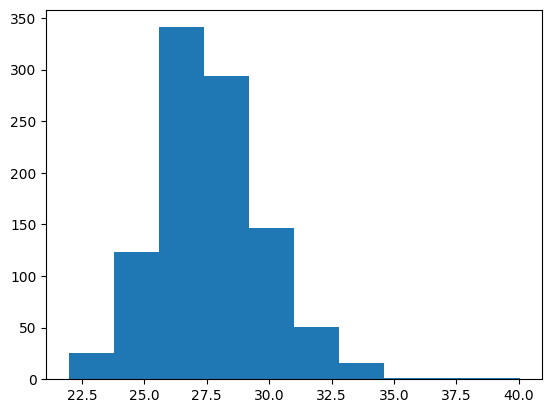

In [56]:
plt.hist(samples)

In [57]:
# Find the 95% confidance interval

sample_mean = samples.mean()
std_dev =samples.std()

sample_size = 50
confidence_level = 0.95

alpha  = 1 - confidence_level

Z_critical =  norm.ppf(1-alpha/2)


margin_of_error = Z_critical * (std_dev / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")

Confidence Interval: (27.031, 28.222)


In [58]:
# Find the 90%  confidance interval

sample_mean = samples.mean()
std_dev =samples.std()

sample_size = 50
confidence_level = 0.90

alpha  = 1 - confidence_level

Z_critical =  norm.ppf(1-alpha/2)


margin_of_error = Z_critical * (std_dev / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")

Confidence Interval: (27.127, 28.126)
